In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm
import pickle
from simulation.sfh_in_box import sfh, plot_sfh, plot_binned_sfh
from data_pd.dump_features import dump_features
from astropy import constants as c


In [2]:
SIMPATH = '/home/michele/sim/MySimulations/ng'

In [3]:
SIM = 'mb.71002'
TRAJ = 'p100_a800_r600'

In [4]:
('mb.71002'+'_p100_a800_r600').split('002_')

['mb.71', 'p100_a800_r600']

In [5]:
sim_path = os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "out")
NTH = 10
sim = simulation.Simulation(sim_path, snap_indexes=slice(None, None, NTH))

loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file


In [6]:
def sigma(vel):
    return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [13]:
G = c.G.to('kpc solMass**-1 km**2 s**-2')
G

<Quantity 4.30091727e-06 km2 kpc / (s2 solMass)>

In [14]:
def sigma_no_dm(m_star, r_eff):
    """Compute sigma from the virial radius assuming no dm.
    m_star in 1e10Msol
    r_eff in kpc
    """
    s = 0.45 * (G.value * m_star / r_eff)
    return s

In [15]:
load_pickle = True
radius = 5
outname = '{}_{}_s{}_n{}.pickle'.format(SIM, TRAJ, radius, NTH)
if load_pickle:
    times, mass, sigma_star, sigma_gas, r_eff, sfr = pickle.load(open(outname, 'rb'))
else:
    dump_features(sim, outname, radius=radius)
    times, mass, sigma_star, sigma_gas, r_eff, sfr = pickle.load(open(outname, 'rb'))

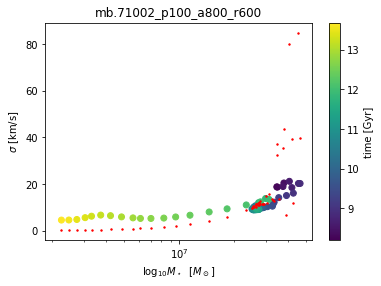

In [17]:
fig, ax = plt.subplots()
im = ax.scatter(mass, sigma_star, c=sim.times)
cbar = fig.colorbar(im)
ax.set_ylabel('$\sigma$ [km/s]')
ax.set_xlabel('$\log_{10} M_\star$  [$M_\odot$]')
cbar.ax.set_ylabel('time [Gyr]')
# m = np.linspace(np.array(mass).min(), np.array(mass).max(), 100)
ax.scatter(mass, sigma_no_dm(mass, r_eff), s=2, c='r');
ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title('{}_{}'.format(SIM, TRAJ));

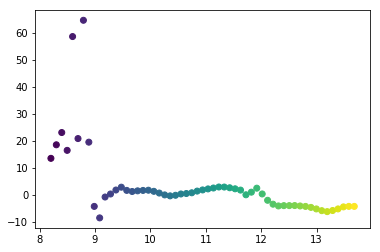

In [21]:
fig, ax = plt.subplots()
im = ax.scatter(times, sigma_no_dm(mass, r_eff)-sigma_star, c=sim.times)


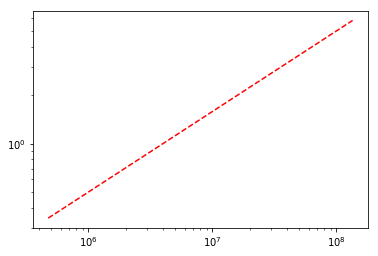

In [46]:
# fig, ax = plt.subplots()
# m = np.linspace(np.array(mass).min(), np.array(mass).max(), 100)
# ax.plot(m, no_dm(m), 'r--');
# ax.set_xscale("log")
# ax.set_yscale("log")